### SHL github project: uat_shl

* training module: shl_tm

* prediction module: shl_pm

* simulation module: shl_sm

* misc module: shl_mm


### data feeds:

* historical bidding price, per second, time series

* live bidding price, per second, time series

### parameter lookup table: python dictionary

* parm_si (seasonality index per second)

* parm_month (parameter like alpha, beta, gamma, etc. per month)

# [1] Import useful reference packages

In [ ]:
import pandas as pd


### Initialization

In [ ]:
# function to fetch Seasonality-Index
def shl_intra_fetch_si(ccyy_mm, time, shl_data_parm_si):
#     return shl_data_parm_si[(shl_data_parm_si['ccyy-mm'] == '2017-09') & (shl_data_parm_si['time'] == '11:29:00')]
    return shl_data_parm_si[(shl_data_parm_si['ccyy-mm'] == ccyy_mm) & (shl_data_parm_si['time'] == time)].iloc[0]['si']


In [ ]:
# function to fetch Dynamic-Increment
def shl_intra_fetch_di(ccyy_mm, shl_data_parm_month):
    return shl_data_parm_month[shl_data_parm_month['ccyy-mm'] == ccyy_mm].iloc[0]['di']


In [ ]:
def shl_intra_fetch_previous_n_sec_time_as_str(shl_data_time_field, n):
    return str((pd.to_datetime(shl_data_time_field, format='%H:%M:%S') - pd.Timedelta(seconds=n)).time())

def shl_intra_fetch_future_n_sec_time_as_str(shl_data_time_field, n):
    return str((pd.to_datetime(shl_data_time_field, format='%H:%M:%S') - pd.Timedelta(seconds=-n)).time())


In [ ]:
def shl_initialize(in_ccyy_mm='2017-07'):
    print()
    print('+-----------------------------------------------+')
    print('| shl_initialize()                              |')
    print('+-----------------------------------------------+')
    print()
    global shl_data_parm_si
    global shl_data_parm_month
    shl_data_parm_si = pd.read_csv('data/parm_si.csv') 
    shl_data_parm_month = pd.read_csv('data/parm_month.csv') 

    global shl_global_parm_ccyy_mm 
    shl_global_parm_ccyy_mm = in_ccyy_mm
    
    # create default global base price
    global shl_global_parm_base_price
    shl_global_parm_base_price = 10000000

    global shl_global_parm_dynamic_increment
    shl_global_parm_dynamic_increment = shl_intra_fetch_di(shl_global_parm_ccyy_mm, shl_data_parm_month)

    global shl_global_parm_alpha
    shl_global_parm_alpha = shl_data_parm_month[shl_data_parm_month['ccyy-mm'] == shl_global_parm_ccyy_mm].iloc[0]['alpha']
    global shl_global_parm_beta
    shl_global_parm_beta  = shl_data_parm_month[shl_data_parm_month['ccyy-mm'] == shl_global_parm_ccyy_mm].iloc[0]['beta']
    global shl_global_parm_gamma
    shl_global_parm_gamma = shl_data_parm_month[shl_data_parm_month['ccyy-mm'] == shl_global_parm_ccyy_mm].iloc[0]['gamma']
    global shl_global_parm_sec57_weight
    shl_global_parm_sec57_weight = shl_data_parm_month[shl_data_parm_month['ccyy-mm'] == shl_global_parm_ccyy_mm].iloc[0]['sec57-weight']
    global shl_global_parm_month_weight
    shl_global_parm_month_weight = shl_data_parm_month[shl_data_parm_month['ccyy-mm'] == shl_global_parm_ccyy_mm].iloc[0]['month-weight']
    global shl_global_parm_short_weight
    shl_global_parm_short_weight = shl_data_parm_month[shl_data_parm_month['ccyy-mm'] == shl_global_parm_ccyy_mm].iloc[0]['short-weight']

    # default = 0
    global shl_global_parm_short_weight_ratio
    shl_global_parm_short_weight_ratio = 0
    
    # create default average error between 46~50 seconds:
    global shl_global_parm_short_weight_misc
    shl_global_parm_short_weight_misc = 0

    
    print('shl_global_parm_ccyy_mm           : %s' % shl_global_parm_ccyy_mm)
    print('-------------------------------------------------')
    print('shl_global_parm_alpha             : %0.15f' % shl_global_parm_alpha) # used in forecasting
    print('shl_global_parm_beta              : %0.15f' % shl_global_parm_beta)  # used in forecasting
    print('shl_global_parm_gamma             : %0.15f' % shl_global_parm_gamma) # used in forecasting
    print('shl_global_parm_short_weight      : %f' % shl_global_parm_short_weight) # used in forecasting
    print('shl_global_parm_short_weight_ratio: %f' % shl_global_parm_short_weight) # used in forecasting
    print('shl_global_parm_sec57_weight      : %f' % shl_global_parm_sec57_weight) # used in training a model
    print('shl_global_parm_month_weight      : %f' % shl_global_parm_month_weight) # used in training a model
    print('shl_global_parm_dynamic_increment : %d' % shl_global_parm_dynamic_increment)
    print('-------------------------------------------------')

#     plt.figure(figsize=(6,3)) # plot seasonality index
#     plt.plot(shl_data_parm_si[(shl_data_parm_si['ccyy-mm'] == shl_global_parm_ccyy_mm)]['si'])
    
    global shl_data_pm_1_step
    shl_data_pm_1_step = pd.DataFrame() # initialize dataframe of prediction results
    print()
    print('prediction results dataframe: shl_data_pm_1_step')
    print(shl_data_pm_1_step)

    global shl_data_pm_k_step
    shl_data_pm_k_step = pd.DataFrame() # initialize dataframe of prediction results
    print()
    print('prediction results dataframe: shl_data_pm_k_step')
    print(shl_data_pm_k_step)
    

In [ ]:
# shl_initialize('2017-06')

shl_predict_price(in_current_time, in_current_price, in_k_sec) # return k-seconrds Predicted Prices, in a list format

shl_predict_set_price(in_current_time, in_current_price, in_k_sec) # return k-second Predicted Price + Dynamic Increment, in a list format

call k times of shl_predict_price()


shl_data_pm_1_step_itr = pd.DataFrame() # initialize prediction dataframe at 11:29:00


In [ ]:
# (shl_data_pm_1_step['f_1_step_pred_price_inc'].shift(1)[46:50] - shl_data_pm_1_step['f_current_price4pm'][46:50]).sum()

In [ ]:
# (shl_data_pm_k_step['f_1_step_pred_price_inc'].shift(1)[46:50] - shl_data_pm_k_step['f_current_price4pm'][46:50]).sum()

In [ ]:
def shl_predict_price_1_step(in_current_time, in_current_price):
# 11:29:00~11:29:50

    global shl_data_pm_k_step
    
    global shl_global_parm_short_weight_misc
    if in_current_time < '11:29:50': shl_global_parm_short_weight_misc = 0
    
    global shl_global_parm_short_weight_ratio
    
    global shl_global_parm_base_price 


    print()
    print('+-----------------------------------------------+')
    print('| shl_predict_price()                           |')
    print('+-----------------------------------------------+')
    print()
    print('current_ccyy_mm   : %s' % shl_global_parm_ccyy_mm) # str, format: ccyy-mm
    print('in_current_time   : %s' % in_current_time) # str, format: hh:mm:ss
    print('in_current_price  : %d' % in_current_price) # number, format: integer
    print('-------------------------------------------------')

    
    # capture & calculate 11:29:00 bid price - 1 as base price
    if in_current_time == '11:29:00':
        shl_global_parm_base_price = in_current_price -1 
        print('*INFO* At time [ %s ] Set shl_global_parm_base_price : %d ' % (in_current_time, shl_global_parm_base_price)) # Debug
        
    f_current_datetime = shl_global_parm_ccyy_mm + ' ' + in_current_time
    print('*INFO* f_current_datetime   : %s ' %  f_current_datetime)

    # get Seasonality-Index, for current second
    f_current_si = shl_intra_fetch_si(shl_global_parm_ccyy_mm, in_current_time, shl_data_parm_si)
    print('*INFO* f_current_si         : %0.10f ' %  f_current_si) # Debug
    
    # get Seasonality-Index, for current second + 1
    f_1_step_time = shl_intra_fetch_future_n_sec_time_as_str(in_current_time, 1)
    f_1_step_si = shl_intra_fetch_si(shl_global_parm_ccyy_mm, f_1_step_time, shl_data_parm_si)
    print('*INFO* f_1_step_si         : %0.10f ' %  f_1_step_si) # Debug
    
    # calculate price increment: f_current_price4pm
    f_current_price4pm = in_current_price -  shl_global_parm_base_price
    print('*INFO* f_current_price4pm   : %d ' % f_current_price4pm) # Debug
    
    # calculate seasonality adjusted price increment: f_current_price4pmsi
    f_current_price4pmsi = f_current_price4pm / f_current_si
    print('*INFO* f_current_price4pmsi : %0.10f ' % f_current_price4pmsi) # Debug
    

    if in_current_time == '11:29:00':
#         shl_data_pm_k_step_itr = pd.DataFrame() # initialize prediction dataframe at 11:29:00
        print('---- call prediction function shl_pm ---- %s' % in_current_time)
        f_1_step_pred_les_level = f_current_price4pmsi # special handling for 11:29:00
        f_1_step_pred_les_trend = 0 # special handling for 11:29:00
        f_1_step_pred_les = f_1_step_pred_les_level + f_1_step_pred_les_trend
        f_1_step_pred_adj_misc = 0
        f_1_step_pred_price_inc = (f_1_step_pred_les + f_1_step_pred_adj_misc) * f_1_step_si
        f_1_step_pred_price = f_1_step_pred_price_inc + shl_global_parm_base_price
        f_1_step_pred_price_rounded = round(f_1_step_pred_price/100, 0) * 100
        f_1_step_pred_set_price_rounded = f_1_step_pred_price_rounded + shl_global_parm_dynamic_increment
        
    else:
        print('---- call prediction function shl_pm ---- %s' % in_current_time)
        
#       function to get average forecast error between 46~50 seconds: mean(f_current_step_error)
        if in_current_time == '11:29:50':
            sec50_pred_price_inc = shl_data_pm_k_step[(shl_data_pm_k_step['ccyy-mm'] == shl_global_parm_ccyy_mm) \
                                                & (shl_data_pm_k_step['f_1_step_time'] ==in_current_time)].iloc[0]['f_1_step_pred_price_inc']
            sec50_error    = sec50_pred_price_inc - f_current_price4pm
            sec46_49_error = (shl_data_pm_k_step['f_1_step_pred_price_inc'].shift(1)[46:50] - shl_data_pm_k_step['f_current_price4pm'][46:50]).sum()
            print('*INFO* sec50_error    : %f' % sec50_error)
            print('*INFO* sec46_49_error : %f' % sec46_49_error)
            
            shl_global_parm_short_weight_misc = (sec50_error + sec46_49_error) / 5
            print('*INFO* shl_global_parm_short_weight_misc  : %f' % shl_global_parm_short_weight_misc)
            
#       ----------------------------------------------------------------------------------------------------        
#       if in_current_time == '11:29:50':
            shl_global_parm_short_weight_ratio = 1
            print('*INFO* shl_global_parm_short_weight_ratio : %d' % shl_global_parm_short_weight_ratio)
        if in_current_time == '11:29:51':
            shl_global_parm_short_weight_ratio = 2
            print('*INFO* shl_global_parm_short_weight_ratio : %d' % shl_global_parm_short_weight_ratio)        
        if in_current_time == '11:29:52':
            shl_global_parm_short_weight_ratio = 3
            print('*INFO* shl_global_parm_short_weight_ratio : %d' % shl_global_parm_short_weight_ratio)        
        if in_current_time == '11:29:53':
            shl_global_parm_short_weight_ratio = 4
            print('*INFO* shl_global_parm_short_weight_ratio : %d' % shl_global_parm_short_weight_ratio)        
        if in_current_time == '11:29:54':
            shl_global_parm_short_weight_ratio = 5
            print('*INFO* shl_global_parm_short_weight_ratio : %d' % shl_global_parm_short_weight_ratio)        
        if in_current_time == '11:29:55':
            shl_global_parm_short_weight_ratio = 6
            print('*INFO* shl_global_parm_short_weight_ratio : %d' % shl_global_parm_short_weight_ratio)        
        if in_current_time == '11:29:56':
            shl_global_parm_short_weight_ratio = 7
            print('*INFO* shl_global_parm_short_weight_ratio : %d' % shl_global_parm_short_weight_ratio)        
        if in_current_time == '11:29:57':
            shl_global_parm_short_weight_ratio = 8
            print('*INFO* shl_global_parm_short_weight_ratio : %d' % shl_global_parm_short_weight_ratio)        
        if in_current_time == '11:29:58':
            shl_global_parm_short_weight_ratio = 9
            print('*INFO* shl_global_parm_short_weight_ratio : %d' % shl_global_parm_short_weight_ratio)        
        if in_current_time == '11:29:59':
            shl_global_parm_short_weight_ratio = 10
            print('*INFO* shl_global_parm_short_weight_ratio : %d' % shl_global_parm_short_weight_ratio)        
        if in_current_time == '11:29:60':
            shl_global_parm_short_weight_ratio = 11
            print('*INFO* shl_global_parm_short_weight_ratio : %d' % shl_global_parm_short_weight_ratio)        
#       ----------------------------------------------------------------------------------------------------        
        
        previous_pred_les_level = shl_data_pm_k_step[(shl_data_pm_k_step['ccyy-mm'] == shl_global_parm_ccyy_mm) \
                                            & (shl_data_pm_k_step['f_1_step_time'] ==in_current_time)].iloc[0]['f_1_step_pred_les_level']
        print('     previous_pred_les_level : %f' % previous_pred_les_level)
        
        previous_pred_les_trend = shl_data_pm_k_step[(shl_data_pm_k_step['ccyy-mm'] == shl_global_parm_ccyy_mm) \
                                            & (shl_data_pm_k_step['f_1_step_time'] ==in_current_time)].iloc[0]['f_1_step_pred_les_trend']
        print('     previous_pred_les_trend : %f' % previous_pred_les_trend)

            
        f_1_step_pred_les_level = shl_global_parm_alpha * f_current_price4pmsi \
                                    + (1 - shl_global_parm_alpha) * (previous_pred_les_level + previous_pred_les_trend)
        print('     f_1_step_pred_les_level  : %f' % f_1_step_pred_les_level)
        f_1_step_pred_les_trend = shl_global_parm_beta * (f_1_step_pred_les_level - previous_pred_les_level) \
                                    + (1 - shl_global_parm_beta) * previous_pred_les_trend
        print('     f_1_step_pred_les_trend  : %f' % f_1_step_pred_les_trend)
        
        f_1_step_pred_les = f_1_step_pred_les_level + f_1_step_pred_les_trend
        f_1_step_pred_adj_misc = shl_global_parm_short_weight_misc * shl_global_parm_short_weight * shl_global_parm_short_weight_ratio * shl_global_parm_gamma
        print('     les + misc               : %f' % (f_1_step_pred_adj_misc+f_1_step_pred_les))
        f_1_step_pred_price_inc = (f_1_step_pred_les + f_1_step_pred_adj_misc) * f_1_step_si
        print('     f_1_step_pred_price_inc  : %f' % f_1_step_pred_price_inc)
        print('     f_1_step_si              : %f' % f_1_step_si)
        f_1_step_pred_price = f_1_step_pred_price_inc + shl_global_parm_base_price
        f_1_step_pred_price_rounded = round(f_1_step_pred_price/100, 0) * 100
        f_1_step_pred_set_price_rounded = f_1_step_pred_price_rounded + shl_global_parm_dynamic_increment
   
        
    # write results to shl_pm dataframe
            
    shl_data_pm_k_step_itr_dict = {
                         'ccyy-mm' : shl_global_parm_ccyy_mm
                        ,'f_current_datetime' : f_current_datetime
                        ,'f_current_bid' : in_current_price
                        ,'f_current_price4pm' : f_current_price4pm
                        ,'f_current_si' : f_current_si
                        ,'f_current_price4pmsi' :  f_current_price4pmsi
                        ,'f_1_step_time' : f_1_step_time # predicted values/price for next second: in_current_time + 1 second
                        ,'f_1_step_si' : f_1_step_si
                        ,'f_1_step_pred_les_level' : f_1_step_pred_les_level
                        ,'f_1_step_pred_les_trend' : f_1_step_pred_les_trend
                        ,'f_1_step_pred_les' : f_1_step_pred_les
                        ,'f_1_step_pred_adj_misc' : f_1_step_pred_adj_misc
                        ,'f_1_step_pred_price_inc' : f_1_step_pred_price_inc
                        ,'f_1_step_pred_price' : f_1_step_pred_price
                        ,'f_1_step_pred_price_rounded' : f_1_step_pred_price_rounded
                        ,'f_1_step_pred_set_price_rounded' : f_1_step_pred_set_price_rounded
                        }
#     shl_data_pm_k_step_itr =  shl_data_pm_k_step_itr.append(shl_data_pm_k_step_itr_dict, ignore_index=True)
#     shl_data_pm_k_step     =  shl_data_pm_k_step.append(shl_data_pm_k_step_itr_dict, ignore_index=True)
    return shl_data_pm_k_step_itr_dict

    

In [ ]:
# return_value = {'f_1_step_pred_price_rounded', 'f_1_step_pred_set_price_rounded'}
def shl_predict_price_k_step(in_current_time, in_current_price, in_k_seconds=1, return_value='f_1_step_pred_set_price_rounded'):
    global shl_data_pm_1_step
    
    global shl_data_pm_k_step
    shl_data_pm_k_step = shl_data_pm_1_step.copy() 
    
    shl_data_pm_itr_dict = {}
    
    for k in range(1,in_k_seconds+1):
        print()
        print('==>> Forecasting next %3d second/step... ' % k)
        if k == 1:
            print('     procesing current second/step k : ', k)
            input_price = in_current_price
            input_time  = in_current_time
            shl_data_pm_itr_dict = shl_predict_price_1_step(input_time, input_price)
            shl_data_pm_1_step     =  shl_data_pm_1_step.append(shl_data_pm_itr_dict, ignore_index=True)
        else:
            print('     procesing current second/step k : ', k)
            input_price = shl_data_pm_itr_dict['f_1_step_pred_price']
            input_time  = shl_data_pm_itr_dict['f_1_step_time']
            shl_data_pm_itr_dict = shl_predict_price_1_step(input_time, input_price)

        shl_data_pm_k_step     =  shl_data_pm_k_step.append(shl_data_pm_itr_dict, ignore_index=True)
        
    print('*INFO* RETURNED PREDICTION LIST :', shl_data_pm_k_step[shl_data_pm_k_step['f_1_step_time'] > in_current_time][return_value].tolist())
    return shl_data_pm_k_step[shl_data_pm_k_step['f_1_step_time'] > in_current_time][return_value].tolist()


In [ ]:
# shl_data_pm_1_step['f_current_price4pm'][46:50]

In [ ]:
# shl_data_pm_1_step['f_1_step_pred_price_inc'].shift(1)[46:50]

In [ ]:
# shl_data_pm_1_step['f_1_step_pred_price_inc'].shift(1)[46:50] - shl_data_pm_1_step['f_current_price4pm'][46:50]

# shl_sm

In [1]:
import shl, pandas as pd

In [2]:
# shl.shl_initialize() # default ccyy-mm is '2017-07'

### shl_sm Simulation Module Parm:

In [11]:
# which month to predict?
# shl_global_parm_ccyy_mm = '2017-04'
# shl_global_parm_ccyy_mm_offset = 1647

shl_sm_parm_ccyy_mm = '2017-05'
shl_sm_parm_ccyy_mm_offset = 1708

# shl_global_parm_ccyy_mm = '2017-06'
# shl_global_parm_ccyy_mm_offset = 1769

# shl_global_parm_ccyy_mm = '2017-07'
# shl_global_parm_ccyy_mm_offset = 1830


In [33]:
shl.shl_initialize(shl_sm_parm_ccyy_mm)


+-----------------------------------------------+
| shl_initialize()                              |
+-----------------------------------------------+

shl_global_parm_ccyy_mm           : 2017-05
-------------------------------------------------
shl_global_parm_alpha             : 0.710089632774752
shl_global_parm_beta              : 0.203023868746573
shl_global_parm_gamma             : 0.166127729865532
shl_global_parm_short_weight      : 0.125000
shl_global_parm_short_weight_ratio: 0.125000
shl_global_parm_sec57_weight      : 0.500000
shl_global_parm_month_weight      : 0.900000
shl_global_parm_dynamic_increment : 300
-------------------------------------------------

prediction results dataframe: shl_data_pm_1_step
Empty DataFrame
Columns: []
Index: []

prediction results dataframe: shl_data_pm_k_step
Empty DataFrame
Columns: []
Index: []


In [5]:
shl.shl_data_pm_1_step

""


In [6]:
shl.shl_data_pm_k_step

""


In [7]:
shl_data_pm_1_step

NameError: name 'shl_data_pm_1_step' is not defined

In [8]:
shl_data_pm_k_step

NameError: name 'shl_data_pm_k_step' is not defined

In [9]:
shl_sm_data = pd.read_csv('shl_sm_data/history_ts.csv') 
shl_sm_data.tail()

,ccyy-mm,time,bid-price,ref-price
1886,2017-07,11:29:56,92100,89800
1887,2017-07,11:29:57,92100,89800
1888,2017-07,11:29:58,92100,89800
1889,2017-07,11:29:59,92200,89800
1890,2017-07,11:30:00,92200,89800


In [ ]:
# shl_data_pm_1_step = pd.DataFrame() # initialize dataframe of prediction results
# shl_data_pm_k_step = pd.DataFrame()

In [35]:
# Upon receiving 11:29:00 second price, to predict till 11:29:49 <- one-step forward price forecasting

# shl.shl_data_pm_1_step = pd.DataFrame() # initialize dataframe of prediction results

for i in range(shl_sm_parm_ccyy_mm_offset, shl_sm_parm_ccyy_mm_offset+50): # use July 2015 data as simulatino
# for i in range(shl_global_parm_ccyy_mm_offset, shl_global_parm_ccyy_mm_offset+55): # use July 2015 data as simulatino
    print('\n<<<< Record No.: %5d >>>>' % i)
    print(shl_sm_data['ccyy-mm'][i]) # format: ccyy-mm
    print(shl_sm_data['time'][i]) # format: hh:mm:ss
    print(shl_sm_data['bid-price'][i]) # format: integer
    shl.shl_predict_price_k_step(shl_sm_data['time'][i], shl_sm_data['bid-price'][i],1) # <- one-step forward price forecasting



<<<< Record No.:  1708 >>>>
2017-05
11:29:00
88500

==>> Forecasting next   1 second/step... 
     procesing current second/step k :  1

+-----------------------------------------------+
| shl_predict_price()                           |
+-----------------------------------------------+

current_ccyy_mm   : 2017-05
in_current_time   : 11:29:00
in_current_price  : 88500
-------------------------------------------------
*INFO* At time [ 11:29:00 ] Set shl_global_parm_base_price : 88499 
*INFO* f_current_datetime   : 2017-05 11:29:00 
*INFO* f_current_si         : 0.0023732830 
*INFO* f_1_step_si         : 0.0154006080 
*INFO* f_current_price4pm   : 1 
*INFO* f_current_price4pmsi : 421.3572506945 
---- call prediction function shl_pm ---- 11:29:00
*INFO* RETURNED PREDICTION LIST : [88800.0]

<<<< Record No.:  1709 >>>>
2017-05
11:29:01
88500

==>> Forecasting next   1 second/step... 
     procesing current second/step k :  1

+-----------------------------------------------+
| shl_predict

*INFO* RETURNED PREDICTION LIST : [88900.0]

<<<< Record No.:  1717 >>>>
2017-05
11:29:09
88600

==>> Forecasting next   1 second/step... 
     procesing current second/step k :  1

+-----------------------------------------------+
| shl_predict_price()                           |
+-----------------------------------------------+

current_ccyy_mm   : 2017-05
in_current_time   : 11:29:09
in_current_price  : 88600
-------------------------------------------------
*INFO* f_current_datetime   : 2017-05 11:29:09 
*INFO* f_current_si         : 0.2021951430 
*INFO* f_1_step_si         : 0.2315430480 
*INFO* f_current_price4pm   : 101 
*INFO* f_current_price4pmsi : 499.5174389525 
---- call prediction function shl_pm ---- 11:29:09
     previous_pred_les_level : 551.274473
     previous_pred_les_trend : 91.325674
     f_1_step_pred_les_level  : 540.998599
     f_1_step_pred_les_trend  : 70.698135
     les + misc               : 611.696734
     f_1_step_pred_price_inc  : 141.634126
     f_1_step

*INFO* RETURNED PREDICTION LIST : [89200.0]

<<<< Record No.:  1725 >>>>
2017-05
11:29:17
88800

==>> Forecasting next   1 second/step... 
     procesing current second/step k :  1

+-----------------------------------------------+
| shl_predict_price()                           |
+-----------------------------------------------+

current_ccyy_mm   : 2017-05
in_current_time   : 11:29:17
in_current_price  : 88800
-------------------------------------------------
*INFO* f_current_datetime   : 2017-05 11:29:17 
*INFO* f_current_si         : 0.4536857340 
*INFO* f_1_step_si         : 0.4866038310 
*INFO* f_current_price4pm   : 301 
*INFO* f_current_price4pmsi : 663.4548486817 
---- call prediction function shl_pm ---- 11:29:17
     previous_pred_les_level : 746.106413
     previous_pred_les_trend : 58.205797
     f_1_step_pred_les_level  : 704.290858
     f_1_step_pred_les_trend  : 37.899075
     les + misc               : 742.189933
     f_1_step_pred_price_inc  : 361.152465
     f_1_step

*INFO* RETURNED PREDICTION LIST : [89100.0]

<<<< Record No.:  1733 >>>>
2017-05
11:29:25
88800

==>> Forecasting next   1 second/step... 
     procesing current second/step k :  1

+-----------------------------------------------+
| shl_predict_price()                           |
+-----------------------------------------------+

current_ccyy_mm   : 2017-05
in_current_time   : 11:29:25
in_current_price  : 88800
-------------------------------------------------
*INFO* f_current_datetime   : 2017-05 11:29:25 
*INFO* f_current_si         : 0.6627720410 
*INFO* f_1_step_si         : 0.6820548030 
*INFO* f_current_price4pm   : 301 
*INFO* f_current_price4pmsi : 454.1531346824 
---- call prediction function shl_pm ---- 11:29:25
     previous_pred_les_level : 484.905874
     previous_pred_les_trend : -14.322647
     f_1_step_pred_les_level  : 458.916389
     f_1_step_pred_les_trend  : -16.691294
     les + misc               : 442.225095
     f_1_step_pred_price_inc  : 301.621750
     f_1_st

*INFO* RETURNED PREDICTION LIST : [89100.0]

<<<< Record No.:  1741 >>>>
2017-05
11:29:33
88800

==>> Forecasting next   1 second/step... 
     procesing current second/step k :  1

+-----------------------------------------------+
| shl_predict_price()                           |
+-----------------------------------------------+

current_ccyy_mm   : 2017-05
in_current_time   : 11:29:33
in_current_price  : 88800
-------------------------------------------------
*INFO* f_current_datetime   : 2017-05 11:29:33 
*INFO* f_current_si         : 0.8434053750 
*INFO* f_1_step_si         : 0.8697610780 
*INFO* f_current_price4pm   : 301 
*INFO* f_current_price4pmsi : 356.8865090527 
---- call prediction function shl_pm ---- 11:29:33
     previous_pred_les_level : 365.673276
     previous_pred_les_trend : -13.224400
     f_1_step_pred_les_level  : 355.599993
     f_1_step_pred_les_trend  : -12.584648
     les + misc               : 343.015345
     f_1_step_pred_price_inc  : 298.341396
     f_1_st

*INFO* RETURNED PREDICTION LIST : [89500.0]

<<<< Record No.:  1749 >>>>
2017-05
11:29:41
89100

==>> Forecasting next   1 second/step... 
     procesing current second/step k :  1

+-----------------------------------------------+
| shl_predict_price()                           |
+-----------------------------------------------+

current_ccyy_mm   : 2017-05
in_current_time   : 11:29:41
in_current_price  : 89100
-------------------------------------------------
*INFO* f_current_datetime   : 2017-05 11:29:41 
*INFO* f_current_si         : 1.1110019540 
*INFO* f_1_step_si         : 1.1632937690 
*INFO* f_current_price4pm   : 601 
*INFO* f_current_price4pmsi : 540.9531439942 
---- call prediction function shl_pm ---- 11:29:41
     previous_pred_les_level : 572.756492
     previous_pred_les_trend : 17.747361
     f_1_step_pred_les_level  : 555.318408
     f_1_step_pred_les_trend  : 10.603876
     les + misc               : 565.922284
     f_1_step_pred_price_inc  : 658.333867
     f_1_step

*INFO* RETURNED PREDICTION LIST : [89700.0]

<<<< Record No.:  1757 >>>>
2017-05
11:29:49
89400

==>> Forecasting next   1 second/step... 
     procesing current second/step k :  1

+-----------------------------------------------+
| shl_predict_price()                           |
+-----------------------------------------------+

current_ccyy_mm   : 2017-05
in_current_time   : 11:29:49
in_current_price  : 89400
-------------------------------------------------
*INFO* f_current_datetime   : 2017-05 11:29:49 
*INFO* f_current_si         : 1.7854261570 
*INFO* f_1_step_si         : 1.9330138830 
*INFO* f_current_price4pm   : 901 
*INFO* f_current_price4pmsi : 504.6414249436 
---- call prediction function shl_pm ---- 11:29:49
     previous_pred_les_level : 509.526790
     previous_pred_les_trend : 1.372911
     f_1_step_pred_les_level  : 506.455764
     f_1_step_pred_les_trend  : 0.470686
     les + misc               : 506.926450
     f_1_step_pred_price_inc  : 979.895866
     f_1_step_s

In [36]:
# Upon receiving 11:29:50 second price, to predict till 11:30:00 <- ten-step forward price forecasting

for i in range(shl_sm_parm_ccyy_mm_offset+50, shl_sm_parm_ccyy_mm_offset+51): # use July 2015 data as simulation
# for i in range(shl_global_parm_ccyy_mm_offset+55, shl_global_parm_ccyy_mm_offset+56): # use July 2015 data as simulation
    print('\n<<<< Record No.: %5d >>>>' % i)
    print(shl_sm_data['ccyy-mm'][i]) # format: ccyy-mm
    print(shl_sm_data['time'][i]) # format: hh:mm:ss
    print(shl_sm_data['bid-price'][i]) # format: integer
######################################################################################################################    
#   call prediction function, returned result is in 'list' format, i.e. [89400.0] or [89400.0, 89400.0, 89400.0, 89500.0, 89500.0, 89500.0, 89500.0, 89600.0, 89600.0, 89600.0]  
######################################################################################################################    
    shl.shl_predict_price_k_step(shl_sm_data['time'][i], shl_sm_data['bid-price'][i],10) # <- ten-step forward price forecasting
######################################################################################################################    



<<<< Record No.:  1758 >>>>
2017-05
11:29:50
89500

==>> Forecasting next   1 second/step... 
     procesing current second/step k :  1

+-----------------------------------------------+
| shl_predict_price()                           |
+-----------------------------------------------+

current_ccyy_mm   : 2017-05
in_current_time   : 11:29:50
in_current_price  : 89500
-------------------------------------------------
*INFO* f_current_datetime   : 2017-05 11:29:50 
*INFO* f_current_si         : 1.9330138830 
*INFO* f_1_step_si         : 2.0077031500 
*INFO* f_current_price4pm   : 1001 
*INFO* f_current_price4pmsi : 517.8441856023 
---- call prediction function shl_pm ---- 11:29:50
*INFO* sec50_error    : -21.104134
*INFO* sec46_49_error : -43.415544
*INFO* shl_global_parm_short_weight_misc  : -12.903936
*INFO* shl_global_parm_short_weight_ratio : 1
     previous_pred_les_level : 506.455764
     previous_pred_les_trend : 0.470686
     f_1_step_pred_les_level  : 514.679021
     f_1_step_

     f_1_step_pred_les_level  : 520.941180
     f_1_step_pred_les_trend  : 0.653931
     les + misc               : 519.183447
     f_1_step_pred_price_inc  : 1516.091809
     f_1_step_si              : 2.920147

==>> Forecasting next  10 second/step... 
     procesing current second/step k :  10

+-----------------------------------------------+
| shl_predict_price()                           |
+-----------------------------------------------+

current_ccyy_mm   : 2017-05
in_current_time   : 11:29:59
in_current_price  : 90015
-------------------------------------------------
*INFO* f_current_datetime   : 2017-05 11:29:59 
*INFO* f_current_si         : 2.9201466620 
*INFO* f_1_step_si         : 3.0517320600 
*INFO* f_current_price4pm   : 1516 
*INFO* f_current_price4pmsi : 519.1834467994 
---- call prediction function shl_pm ---- 11:29:59
*INFO* shl_global_parm_short_weight_ratio : 10
     previous_pred_les_level : 520.941180
     previous_pred_les_trend : 0.653931
     f_1_step_pred_l

In [37]:
shl.shl_data_pm_1_step.tail(11)

,ccyy-mm,f_1_step_pred_adj_misc,f_1_step_pred_les,f_1_step_pred_les_level,f_1_step_pred_les_trend,f_1_step_pred_price,f_1_step_pred_price_inc,f_1_step_pred_price_rounded,f_1_step_pred_set_price_rounded,f_1_step_si,f_1_step_time,f_current_bid,f_current_datetime,f_current_price4pm,f_current_price4pmsi,f_current_si
40,2017-05,0.000000,590.503853,572.756492,17.747361,89155.050934,656.050934,89200.0,89500.0,1.111002,11:29:41,89100.0,2017-05 11:29:40,601.0,555.747426,1.081427
41,2017-05,0.000000,565.922284,555.318408,10.603876,89157.333867,658.333867,89200.0,89500.0,1.163294,11:29:42,89100.0,2017-05 11:29:41,601.0,540.953144,1.111002
42,2017-05,0.000000,534.423528,530.924947,3.498581,89184.073440,685.073440,89200.0,89500.0,1.281892,11:29:43,89100.0,2017-05 11:29:42,601.0,516.636482,1.163294
43,2017-05,0.000000,481.895457,487.852006,-5.956550,89166.966013,667.966013,89200.0,89500.0,1.386122,11:29:44,89100.0,2017-05 11:29:43,601.0,468.838115,1.281892
44,2017-05,0.000000,496.297459,498.818272,-2.520814,89208.133969,709.133969,89200.0,89500.0,1.428849,11:29:45,89200.0,2017-05 11:29:44,701.0,505.727400,1.386122
45,2017-05,0.000000,488.913651,492.255150,-3.341499,89263.721999,764.721999,89300.0,89600.0,1.564125,11:29:46,89200.0,2017-05 11:29:45,701.0,490.604785,1.428849
46,2017-05,0.000000,505.385567,505.383329,0.002239,89329.787260,830.787260,89300.0,89600.0,1.643868,11:29:47,89300.0,2017-05 11:29:46,801.0,512.107452,1.564125
47,2017-05,0.000000,489.908518,492.518584,-2.610066,89351.901507,852.901507,89400.0,89700.0,1.740940,11:29:48,89300.0,2017-05 11:29:47,801.0,487.265343,1.643868
48,2017-05,0.000000,510.899701,509.526790,1.372911,89411.173689,912.173689,89400.0,89700.0,1.785426,11:29:49,89400.0,2017-05 11:29:48,901.0,517.536399,1.740940
49,2017-05,0.000000,506.926450,506.455764,0.470686,89478.895866,979.895866,89500.0,89800.0,1.933014,11:29:50,89400.0,2017-05 11:29:49,901.0,504.641425,1.785426


In [38]:
shl.shl_data_pm_k_step.tail(20)

,ccyy-mm,f_1_step_pred_adj_misc,f_1_step_pred_les,f_1_step_pred_les_level,f_1_step_pred_les_trend,f_1_step_pred_price,f_1_step_pred_price_inc,f_1_step_pred_price_rounded,f_1_step_pred_set_price_rounded,f_1_step_si,f_1_step_time,f_current_bid,f_current_datetime,f_current_price4pm,f_current_price4pmsi,f_current_si
40,2017-05,0.000000,590.503853,572.756492,17.747361,89155.050934,656.050934,89200.0,89500.0,1.111002,11:29:41,89100.000000,2017-05 11:29:40,601.000000,555.747426,1.081427
41,2017-05,0.000000,565.922284,555.318408,10.603876,89157.333867,658.333867,89200.0,89500.0,1.163294,11:29:42,89100.000000,2017-05 11:29:41,601.000000,540.953144,1.111002
42,2017-05,0.000000,534.423528,530.924947,3.498581,89184.073440,685.073440,89200.0,89500.0,1.281892,11:29:43,89100.000000,2017-05 11:29:42,601.000000,516.636482,1.163294
43,2017-05,0.000000,481.895457,487.852006,-5.956550,89166.966013,667.966013,89200.0,89500.0,1.386122,11:29:44,89100.000000,2017-05 11:29:43,601.000000,468.838115,1.281892
44,2017-05,0.000000,496.297459,498.818272,-2.520814,89208.133969,709.133969,89200.0,89500.0,1.428849,11:29:45,89200.000000,2017-05 11:29:44,701.000000,505.727400,1.386122
45,2017-05,0.000000,488.913651,492.255150,-3.341499,89263.721999,764.721999,89300.0,89600.0,1.564125,11:29:46,89200.000000,2017-05 11:29:45,701.000000,490.604785,1.428849
46,2017-05,0.000000,505.385567,505.383329,0.002239,89329.787260,830.787260,89300.0,89600.0,1.643868,11:29:47,89300.000000,2017-05 11:29:46,801.000000,512.107452,1.564125
47,2017-05,0.000000,489.908518,492.518584,-2.610066,89351.901507,852.901507,89400.0,89700.0,1.740940,11:29:48,89300.000000,2017-05 11:29:47,801.000000,487.265343,1.643868
48,2017-05,0.000000,510.899701,509.526790,1.372911,89411.173689,912.173689,89400.0,89700.0,1.785426,11:29:49,89400.000000,2017-05 11:29:48,901.000000,517.536399,1.740940
49,2017-05,0.000000,506.926450,506.455764,0.470686,89478.895866,979.895866,89500.0,89800.0,1.933014,11:29:50,89400.000000,2017-05 11:29:49,901.000000,504.641425,1.785426


### MISC - Validation

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

In [40]:
shl_data_pm_k_step_test = shl.shl_data_pm_k_step.copy()

shl_data_pm_k_step_test.index = shl_data_pm_k_step_test.index + 1

shl_data_pm_k_step_test


,ccyy-mm,f_1_step_pred_adj_misc,f_1_step_pred_les,f_1_step_pred_les_level,f_1_step_pred_les_trend,f_1_step_pred_price,f_1_step_pred_price_inc,f_1_step_pred_price_rounded,f_1_step_pred_set_price_rounded,f_1_step_si,f_1_step_time,f_current_bid,f_current_datetime,f_current_price4pm,f_current_price4pmsi,f_current_si
1,2017-05,0.000000,421.357251,421.357251,0.000000,88505.489158,6.489158,88500.0,88800.0,0.015401,11:29:01,88500.000000,2017-05 11:29:00,1.000000,421.357251,0.002373
2,2017-05,0.000000,116.879706,168.263731,-51.384025,88501.886938,2.886938,88500.0,88800.0,0.024700,11:29:02,88500.000000,2017-05 11:29:01,1.000000,64.932501,0.015401
3,2017-05,0.000000,0.235734,62.633112,-62.397379,88499.007588,0.007588,88500.0,88800.0,0.032190,11:29:03,88500.000000,2017-05 11:29:02,1.000000,40.485697,0.024700
4,2017-05,0.000000,-35.824866,22.127884,-57.952750,88497.537545,-1.462455,88500.0,88800.0,0.040822,11:29:04,88500.000000,2017-05 11:29:03,1.000000,31.065856,0.032190
5,2017-05,0.000000,-42.247894,7.008633,-49.256527,88497.294868,-1.705132,88500.0,88800.0,0.040360,11:29:05,88500.000000,2017-05 11:29:04,1.000000,24.496390,0.040822
6,2017-05,0.000000,-34.248165,5.345722,-39.593887,88496.296098,-2.703902,88500.0,88800.0,0.078950,11:29:06,88500.000000,2017-05 11:29:05,1.000000,24.776907,0.040360
7,2017-05,0.000000,-33.765232,-0.934761,-32.830471,88495.683370,-3.316630,88500.0,88800.0,0.098226,11:29:07,88500.000000,2017-05 11:29:06,1.000000,12.666199,0.078950
8,2017-05,0.000000,-29.054779,-2.559763,-26.495016,88495.276953,-3.723047,88500.0,88800.0,0.128139,11:29:08,88500.000000,2017-05 11:29:07,1.000000,10.180585,0.098226
9,2017-05,0.000000,642.600147,551.274473,91.325674,88628.930629,129.930629,88600.0,88900.0,0.202195,11:29:09,88600.000000,2017-05 11:29:08,101.000000,788.207191,0.128139
10,2017-05,0.000000,611.696734,540.998599,70.698135,88640.634126,141.634126,88600.0,88900.0,0.231543,11:29:10,88600.000000,2017-05 11:29:09,101.000000,499.517439,0.202195


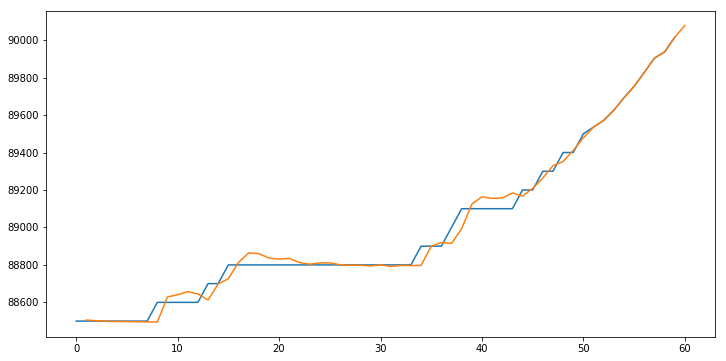

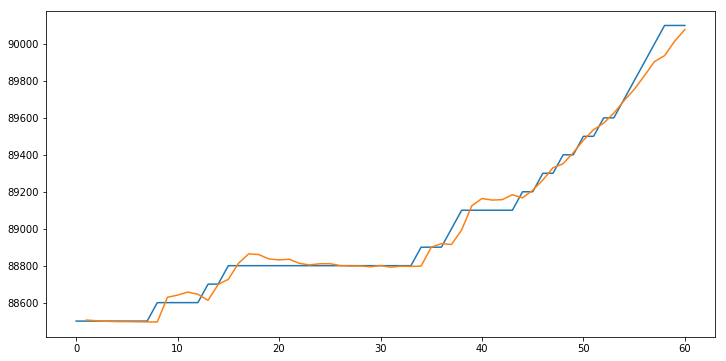

In [41]:
# bid is predicted bid-price from shl_pm
plt.figure(figsize=(12,6))
plt.plot(shl.shl_data_pm_k_step['f_current_bid'])
# plt.plot(shl_data_pm_1_step_k_step['f_1_step_pred_price'].shift(1))
plt.plot(shl_data_pm_k_step_test['f_1_step_pred_price'])

# bid is actual bid-price from raw dataset
shl_data_actual_bid = shl_sm_data[shl_sm_parm_ccyy_mm_offset:shl_sm_parm_ccyy_mm_offset+61].copy()
shl_data_actual_bid.reset_index(inplace=True)
plt.figure(figsize=(12,6))
plt.plot(shl_data_actual_bid['bid-price'])
plt.plot(shl_data_pm_k_step_test['f_1_step_pred_price'])


In [42]:
# pd.concat([shl_data_actual_bid['bid-price'], shl_data_pm_k_step_test['f_1_step_pred_price'], shl_data_pm_k_step_test['f_1_step_pred_price'] - shl_data_actual_bid['bid-price']], axis=1, join='inner')
pd.concat([shl_data_actual_bid['bid-price'].tail(11), shl_data_pm_k_step_test['f_1_step_pred_price'].tail(11), shl_data_pm_k_step_test['f_1_step_pred_price'].tail(11) - shl_data_actual_bid['bid-price'].tail(11)], axis=1, join='inner')


,bid-price,f_1_step_pred_price,0
50,89500,89478.895866,-21.104134
51,89500,89535.889738,35.889738
52,89600,89571.281196,-28.718804
53,89600,89625.831522,25.831522
54,89700,89692.539696,-7.460304
55,89800,89753.309845,-46.690155
56,89900,89827.255011,-72.744989
57,90000,89903.959355,-96.040645
58,90100,89936.800595,-163.199405
59,90100,90015.091809,-84.908191


---

### The End